## Importing required packages

In [1]:
import os, sys
import glob
import shutil
import zipfile
import numpy as np
from numpy.random import random, permutation
from keras import applications
from keras.preprocessing import image
import PIL
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib import pyplot as plt
import time
import tarfile
import pandas as pd
import shutil,glob

Using TensorFlow backend.


In [70]:
os.chdir('/home/ubuntu/yelp')

In [71]:
!ls

models	   train.csv.tgz	       train_photo_to_biz_ids.csv.tgz
train	   train_photos.tgz	       valid
train.csv  train_photo_to_biz_ids.csv


## Data Preprocessing

In [ ]:
data_path='/home/ubuntu/yelp'

for file in os.scandir(data_path):
    if file.name.endswith('.tgz'):
        tarfile.open(file.name).extractall(data_path)

In [ ]:
train_list=tarfile.open("train_photos.tgz").getmembers()

In [ ]:
#tarfile.open("train_photos.tgz").extractall(data_path,members=train_list[:1000])
#int(train_list[5].name.split("/")[1].split(".")[0])
#train_list.name.index("train_photos/100003.jpg")
#type(train_list)
info=train_list[3]
info.name.split("/")[1].split(".jpg")[0]

In [ ]:
train_csv = pd.read_csv("train.csv")
train_photo_to_biz_ids = pd.read_csv("train_photo_to_biz_ids.csv")

In [ ]:
train_csv.head()

In [ ]:
train_photo_to_biz_ids.head()

### Labelling Images

In [ ]:
label_notation = {0: 'good_for_lunch', 1: 'good_for_dinner', 2: 'takes_reservations',  3: 'outdoor_seating',
                  4: 'restaurant_is_expensive', 5: 'has_alcohol', 6: 'has_table_service', 7: 'ambience_is_classy',
                  8: 'good_for_kids'}

In [ ]:
photo_data=train_photo_to_biz_ids.join(train_csv.set_index('business_id'),how='inner',on='business_id')
photo_data.head()

In [ ]:
for l in label_notation:
    os.makedirs(data_path+"/"+str(l))

In [ ]:
tarfile.open("train_photos.tgz").extractall(data_path+"/"+str(l),members=photo_id)

In [ ]:
def tar_files(photo_id):
    tar_info=list()
    for tarinfo in train_list[3::2]:
        #print(tarinfo.name)
        if int(tarinfo.name.split("/")[1].split(".")[0]) in photo_id:
             tar_info.append(tarinfo)
    return tar_info

In [ ]:
for l in label_notation:
    photo_id=photo_data[photo_data["labels"].str.contains(str(l))==True].photo_id.tolist()[:1000]
    tarfile.open("train_photos.tgz").extractall(data_path+"/"+str(l),members=tar_files(photo_id))
    

In [ ]:
source = "/home/ubuntu/yelp/8/train_photos/"
dest1 = "/home/ubuntu/yelp/8/"

for txt_file in glob.glob(source+"*.jpg"):
    shutil.move(txt_file, dest1);

## Spliting Data set into train and validation

In [2]:
data_path='/home/ubuntu/yelp/'

In [ ]:
def create_validation_data(in_dir, out_dir, valid_percent):

    valid_size = int(len([name for name in os.listdir(in_dir)]) * valid_percent)
    os.chdir(in_dir)
    g = glob.glob('*.jpg')
    shuffled = np.random.permutation(g)
    if not int(len([name for name in os.listdir(out_dir)])):
        for i in range(valid_size): 
            shutil.move(shuffled[i], out_dir + shuffled[i])
    valid_data_size = len([name for name in os.listdir(out_dir)])
    print(valid_data_size, out_dir)

In [ ]:
#if not os.path.exists(data_path + 'valid'):
for l in label_notation:
    if not os.path.exists(data_path + 'valid' + "/" + str(l)):
        os.makedirs(data_path + 'valid' + "/" + str(l))
        create_validation_data((data_path + 'train' + "/" + str(l)), (data_path + 'valid' + "/" + str(l) + "/" ), 0.3)

## Visualising the images in each class

In [43]:
image_path = '/home/ubuntu/yelp/train/0/205.jpg'

### 0: 'good_for_lunch'

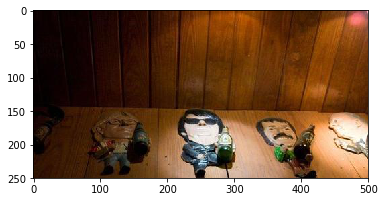

In [44]:
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 1: 'good_for_dinner'

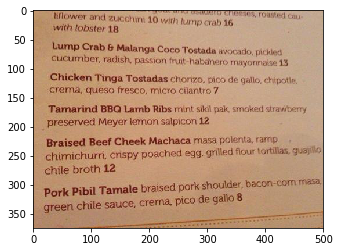

In [46]:
image_path = '/home/ubuntu/yelp/train/1/260.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 2: 'takes_reservations'

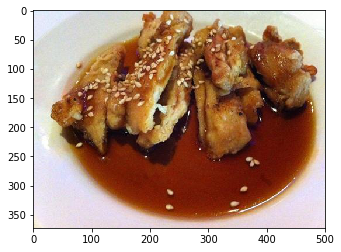

In [49]:
image_path = '/home/ubuntu/yelp/train/2/337.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 3: 'outdoor_seating'

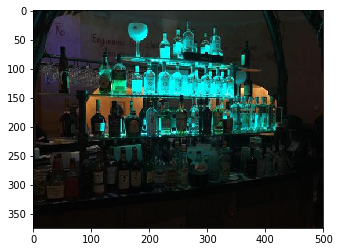

In [54]:
image_path = '/home/ubuntu/yelp/train/3/1246.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 4: 'restaurant_is_expensive'

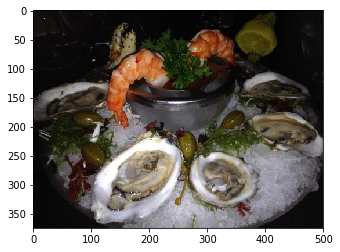

In [55]:
image_path = '/home/ubuntu/yelp/train/4/809.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 5: 'has_alcohol'

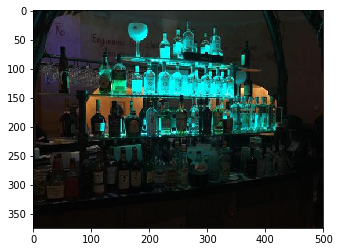

In [56]:
image_path = '/home/ubuntu/yelp/train/5/1246.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 6: 'has_table_service'

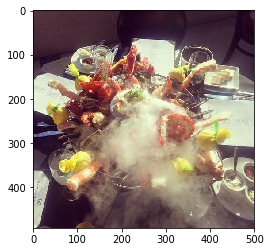

In [58]:
image_path = '/home/ubuntu/yelp/train/6/2625.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 7: 'ambience_is_classy'

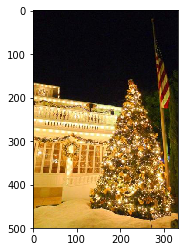

In [59]:
image_path = '/home/ubuntu/yelp/train/7/18280.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## 8: 'good_for_kids'

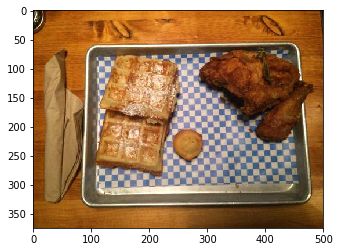

In [61]:
image_path = '/home/ubuntu/yelp/train/8/25278.jpg'
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

## Data is very messy, each image can be multiple in classes and some of them are wrongly tagged by users

## Importing Model: VGG16

In [23]:
vgg = applications.VGG16(include_top=True, weights='imagenet')
#!sudo find / -iname 'resnet50_weights_tf_dim_ordering_tf_kernels.h5' -print

In [24]:
model_path = data_path + 'models/'
if not os.path.exists(model_path): 
    os.mkdir(model_path)

In [25]:
batch_size=10

In [26]:
def classes_from_dir(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=batch_size, class_mode='binary',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [27]:
val_batch_class = classes_from_dir(data_path+'valid', shuffle=False, batch_size=batch_size)
trn_batch_class = classes_from_dir(data_path+'train', shuffle=False, batch_size=batch_size)

Found 2700 images belonging to 9 classes.
Found 6300 images belonging to 9 classes.


In [28]:
def get_data(path, batch_size, target_size=(224,224)):
    batch_class = classes_from_dir(path, shuffle=False, batch_size=batch_size, class_mode=None, target_size=target_size)
    return np.concatenate([batch_class.next() for i in range(int(batch_class.samples/batch_size))])

In [29]:
val_data = get_data(data_path+'valid', batch_size)
trn_data = get_data(data_path+'train', batch_size)

Found 2700 images belonging to 9 classes.
Found 6300 images belonging to 9 classes.


In [30]:
trn_data.shape

(6300, 224, 224, 3)

In [31]:
val_data.shape

(2700, 224, 224, 3)

In [32]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [33]:
val_classes = val_batch_class.classes
trn_classes = trn_batch_class.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [34]:
trn_labels.shape

(6300, 9)

In [35]:
trn_classes[:2]

array([0, 0], dtype=int32)

In [36]:
trn_labels[:2]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [37]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [38]:
vgg.layers.pop()
for layer in vgg.layers: layer.trainable=False
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [39]:
from keras.models import Model
new_layer = Dense(9, activation='softmax', name='predictions')
inp = vgg.input
out = new_layer(vgg.layers[-1].output)
model2 = Model(inp, out)

In [40]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [41]:
batches = image.ImageDataGenerator().flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = image.ImageDataGenerator().flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

In [42]:
def fit_model(model, batches, val_batches, batch_size, nb_epoch=1):
    model.fit_generator(batches, steps_per_epoch=batches.n/batch_size, epochs=nb_epoch, 
                        validation_data=val_batches, validation_steps=val_batches.n/batch_size)

In [43]:
print(batches.n)

6300


In [44]:
model2.save_weights(model_path+'run_test4-bat100-epoch-'+'init'+'-'+'resnet.h5')
opt = Adam(lr=0.001, decay=1e-06)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Accuracy of VGG16 model

In [45]:
num_of_epochs = 2
for i in range(num_of_epochs):
    start = time.time()
    fit_model(model2, batches, val_batches, batch_size, nb_epoch=1)
    #model2.save_weights(model_path+'run_test4-bat100-epoch-'+str(i+1)+'-'+'vgg16.h5')
    end = time.time()
    print(end - start)

Epoch 1/1
630/630 [==============================] - 126s 199ms/step - loss: 3.5258 - acc: 0.1756 - val_loss: 3.3692 - val_acc: 0.2007
125.7728865146637
Epoch 1/1
630/630 [==============================] - 123s 196ms/step - loss: 2.8935 - acc: 0.2632 - val_loss: 3.6947 - val_acc: 0.1919
123.49301433563232


## Importing Model: InceptionV3 

In [48]:
resnet = applications.resnet50.ResNet50(include_top=True, weights='imagenet')

In [49]:
resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
# vgg.layers.pop()
# for layer in vgg.layers: layer.trainable=False
# vgg.summary()

In [50]:
new_layer = Dense(9, activation='softmax', name='predictions')
inp = resnet.input
out = new_layer(resnet.layers[-1].output)
model3 = Model(inp, out)

In [51]:
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [53]:
opt = Adam(lr=0.001, decay=1e-06)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Accuracy of ResNet model

In [54]:
num_of_epochs = 2
for i in range(num_of_epochs):
    start = time.time()
    fit_model(model3, batches, val_batches, batch_size, nb_epoch=1)
    #model2.save_weights(model_path+'run_test4-bat100-epoch-'+str(i+1)+'-'+'vgg16.h5')
    end = time.time()
    print(end - start)

Epoch 1/1
630/630 [==============================] - 318s 505ms/step - loss: 2.1922 - acc: 0.1283 - val_loss: 2.2062 - val_acc: 0.1111
326.74010181427
Epoch 1/1
630/630 [==============================] - 304s 483ms/step - loss: 2.1859 - acc: 0.1408 - val_loss: 2.1806 - val_acc: 0.1563
304.16336369514465


## VGG model has high accuracy than Resnet

### So we are using VGG model for scoring the data

In [55]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [61]:
def plots_idx(idx, titles=None):
    plots([image.load_img(data_path + 'valid/' + filenames[i]) for i in idx], titles=titles)

In [57]:
probs = model2.predict(val_data, batch_size=batch_size)
probs = np.round(probs, 5)
probs[:, 0]
preds = probs.argmax(axis=-1)
preds[:4]

array([8, 8, 8, 0])

In [58]:
filenames = val_batch_class.filenames

In [63]:
n_view = 2

# A few correct labels at random

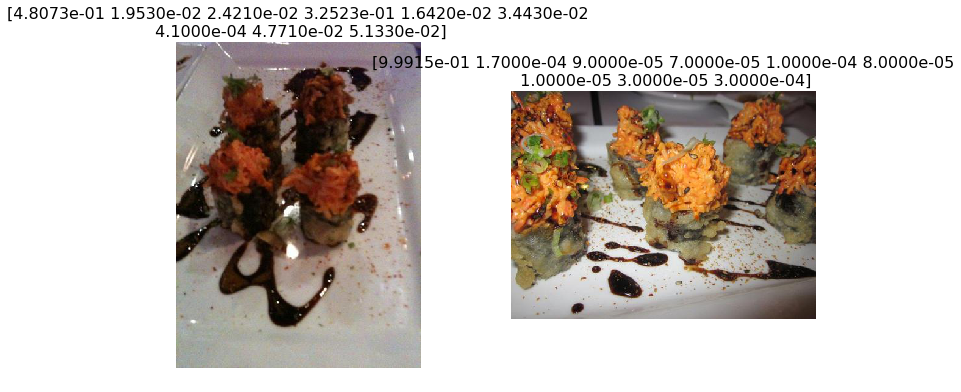

In [64]:
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

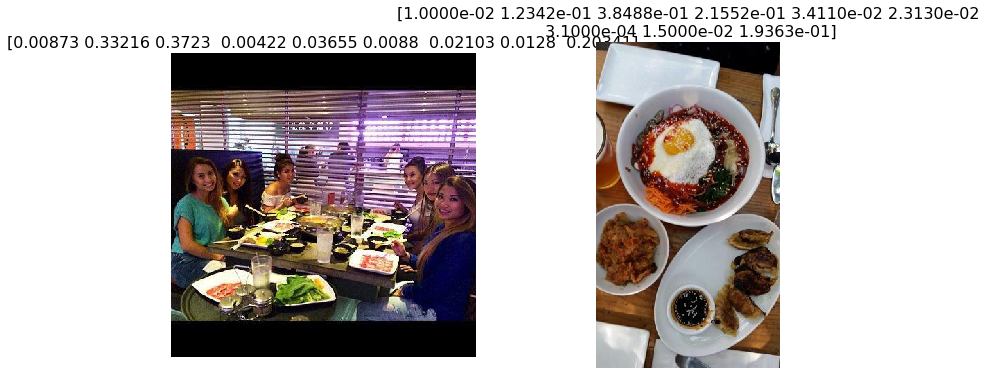

In [65]:
# A few incorrect labels at random

incorrect = np.where(preds!=val_labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

## Confusion matrix is a good way to visualize the quality of classification 

In [66]:
cm = confusion_matrix(val_classes, preds)

In [67]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[203  14  12  24  10   2   6   4  25]
 [ 11  13 100  30  13  12  32  16  73]
 [ 11  43  54  45  15  12  20  20  80]
 [ 33  30  61  47  20   7   5  25  72]
 [ 23  19  58  35  95  10   9  28  23]
 [ 15  35  98  38  10   4  24  15  61]
 [  8  35 101  32  14  10   1  21  78]
 [ 36  31  83  48  47   8   8  19  20]
 [ 17  40  70  49   7   4  28   3  82]]


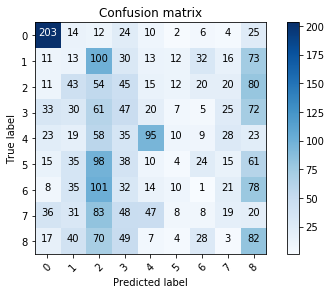

In [68]:
plot_confusion_matrix(cm, val_batch_class.class_indices)

## Even though accuracy of model is low due to the high number of classes and duplicate images in each class, this model can greatly reduce the time takes for tagging the images manually